# Importar livrarias Pyhton:

In [1]:
import pandas as pd
from pandas import read_csv
import numpy as np
import warnings
import matplotlib as plt
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
import matplotlib.dates as mdates
import datetime as dt
from scipy.signal import find_peaks
%matplotlib notebook

In [2]:
# timeseries = pd.read_csv('IH Agitacao Maritima 2004-2021.csv', sep=',', parse_dates=['datetime'], index_col=['datetime'])
# timeseries = timeseries.resample('1H').mean().interpolate(method='spline', order=2)
# timeseries.index = pd.to_datetime(timeseries.index, errors='coerce')
# timeseries = timeseries.sort_index().dropna()
# timeseries.to_csv('IH Agitacao Maritima 2004-2021 final.csv')  
# timeseries

timeseries = pd.read_csv('IH Agitacao Maritima 2004-2021 final.csv', sep=',', parse_dates=['datetime'], index_col=['datetime'])
timeseries = timeseries.resample('1H').mean().interpolate(method='spline', order=2)
timeseries.index = pd.to_datetime(timeseries.index, errors='coerce')
timeseries = timeseries.sort_index().dropna()
timeseries

,HM0,T02,TP,THTP,SPRTP,HS,HMAX,THS,THMAX,TZ,TMAX
datetime,,,,,,,,,,,
2004-01-01 00:00:00,1.820000,6.100000,10.000000,327.000000,24.000000,1.740000,2.910000,8.500000,9.400000,6.500000,12.500000
2004-01-01 01:00:00,2.480272,5.790821,10.385080,322.989370,38.321335,2.515595,2.821794,7.283379,9.351660,6.160423,13.600886
2004-01-01 02:00:00,2.480443,5.790429,10.018340,319.724545,37.653582,2.515247,2.823149,7.331416,9.129291,6.160267,13.305406
2004-01-01 03:00:00,1.730000,6.500000,9.100000,317.000000,22.000000,1.670000,3.180000,8.300000,9.400000,6.800000,13.300000
2004-01-01 04:00:00,2.480786,5.790196,9.359784,315.308997,7.231272,2.514551,2.826089,7.426157,8.720122,6.160670,12.774403
...,...,...,...,...,...,...,...,...,...,...,...
2021-06-13 09:00:00,1.060000,7.300000,10.000000,297.000000,29.000000,1.030000,1.720000,9.400000,10.200000,7.400000,13.300000
2021-06-13 10:00:00,1.070000,7.600000,10.000000,297.000000,27.000000,1.010000,1.500000,9.000000,9.400000,8.100000,13.300000
2021-06-13 11:00:00,1.100000,7.500000,10.500000,301.000000,33.000000,1.010000,1.760000,9.000000,10.200000,7.700000,13.300000


In [3]:
timeseries.describe().round(2)

,HM0,T02,TP,THTP,SPRTP,HS,HMAX,THS,THMAX,TZ,TMAX
count,152966.00,152966.00,152966.00,152966.00,152966.00,152966.00,152966.00,152966.00,152966.00,152966.00,152966.00
mean,2.21,7.01,11.59,965.79,60.76,2.09,3.29,9.31,10.74,7.46,14.33
std,1.02,1.99,7.32,5021.33,519.37,0.95,2.65,5.13,8.91,2.07,3.15
min,0.30,2.90,-28.64,-5432.66,-2156.55,0.25,-24.85,-26.95,-50.95,3.00,6.08
25%,1.53,5.66,9.10,291.00,19.00,1.45,2.18,7.70,7.80,6.07,12.27
50%,1.95,6.69,11.10,308.99,23.00,1.89,2.92,9.20,9.69,7.11,14.10
75%,2.71,7.99,12.75,323.92,28.00,2.53,4.16,10.80,11.70,8.45,15.87
max,9.30,18.92,74.30,52001.71,4639.55,8.93,15.47,46.73,83.78,19.93,33.77


# Série das tempestades (HS > 5.0m)

In [4]:
tempestades = timeseries[timeseries.HS > 6.0].sort_values("HS", ascending = False).round(2)
tempestades

,HM0,T02,TP,THTP,SPRTP,HS,HMAX,THS,THMAX,TZ,TMAX
datetime,,,,,,,,,,,
2014-03-03 15:00:00,9.19,12.20,18.20,304.0,15.5,8.93,14.79,16.5,16.40,12.80,23.80
2014-03-03 16:00:00,9.23,11.95,18.20,302.5,14.5,8.85,13.07,16.3,18.00,12.45,22.65
2013-01-19 07:00:00,8.97,9.80,13.30,265.5,23.0,8.70,13.99,12.1,12.50,9.95,17.20
2010-11-09 12:00:00,8.88,11.30,18.20,316.0,21.0,8.49,12.88,15.4,17.20,11.10,20.30
2014-03-03 13:00:00,8.82,11.40,18.20,304.0,17.5,8.46,13.38,16.1,18.00,11.85,23.05
...,...,...,...,...,...,...,...,...,...,...,...
2014-01-28 18:00:00,6.38,9.95,14.85,319.0,18.5,6.01,9.20,13.3,13.70,10.60,18.80
2009-11-22 17:00:00,6.18,11.40,16.05,301.5,21.0,6.01,8.04,14.7,14.45,11.80,19.50
2007-12-02 02:00:00,6.28,13.75,18.20,309.0,19.0,6.01,9.47,17.1,16.80,13.95,23.45


In [5]:
mares = pd.read_csv('niveis-de-mare-leixoes.csv', sep=',', parse_dates=['datetime'], index_col=['datetime'])
mares.index = pd.to_datetime(mares.index, errors='coerce')
mares = mares.sort_index().dropna()
mares = mares["2004-01-01":"2050-01-01"]
mares

,TIDE
datetime,
2004-01-01 00:00:00,2.577314
2004-01-01 01:00:00,2.263779
2004-01-01 02:00:00,1.952179
2004-01-01 03:00:00,1.719371
2004-01-01 04:00:00,1.623935
...,...
2049-12-31 19:00:00,2.872374
2049-12-31 20:00:00,3.107284
2049-12-31 21:00:00,3.115988


In [6]:
mares.describe().round(3)

,TIDE
count,403248.000
mean,2.184
std,0.805
min,0.214
25%,1.520
50%,2.181
75%,2.855
max,4.088


In [7]:
timeseries = timeseries.join(mares)

In [8]:
timeseries

,HM0,T02,TP,THTP,SPRTP,HS,HMAX,THS,THMAX,TZ,TMAX,TIDE
datetime,,,,,,,,,,,,
2004-01-01 00:00:00,1.820000,6.100000,10.000000,327.000000,24.000000,1.740000,2.910000,8.500000,9.400000,6.500000,12.500000,2.577314
2004-01-01 01:00:00,2.480272,5.790821,10.385080,322.989370,38.321335,2.515595,2.821794,7.283379,9.351660,6.160423,13.600886,2.263779
2004-01-01 02:00:00,2.480443,5.790429,10.018340,319.724545,37.653582,2.515247,2.823149,7.331416,9.129291,6.160267,13.305406,1.952179
2004-01-01 03:00:00,1.730000,6.500000,9.100000,317.000000,22.000000,1.670000,3.180000,8.300000,9.400000,6.800000,13.300000,1.719371
2004-01-01 04:00:00,2.480786,5.790196,9.359784,315.308997,7.231272,2.514551,2.826089,7.426157,8.720122,6.160670,12.774403,1.623935
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-13 09:00:00,1.060000,7.300000,10.000000,297.000000,29.000000,1.030000,1.720000,9.400000,10.200000,7.400000,13.300000,1.411102
2021-06-13 10:00:00,1.070000,7.600000,10.000000,297.000000,27.000000,1.010000,1.500000,9.000000,9.400000,8.100000,13.300000,1.178037
2021-06-13 11:00:00,1.100000,7.500000,10.500000,301.000000,33.000000,1.010000,1.760000,9.000000,10.200000,7.700000,13.300000,1.215925


# LEIXÕES boia - Picos de tempestades 2004-2021

<IPython.core.display.Javascript object>


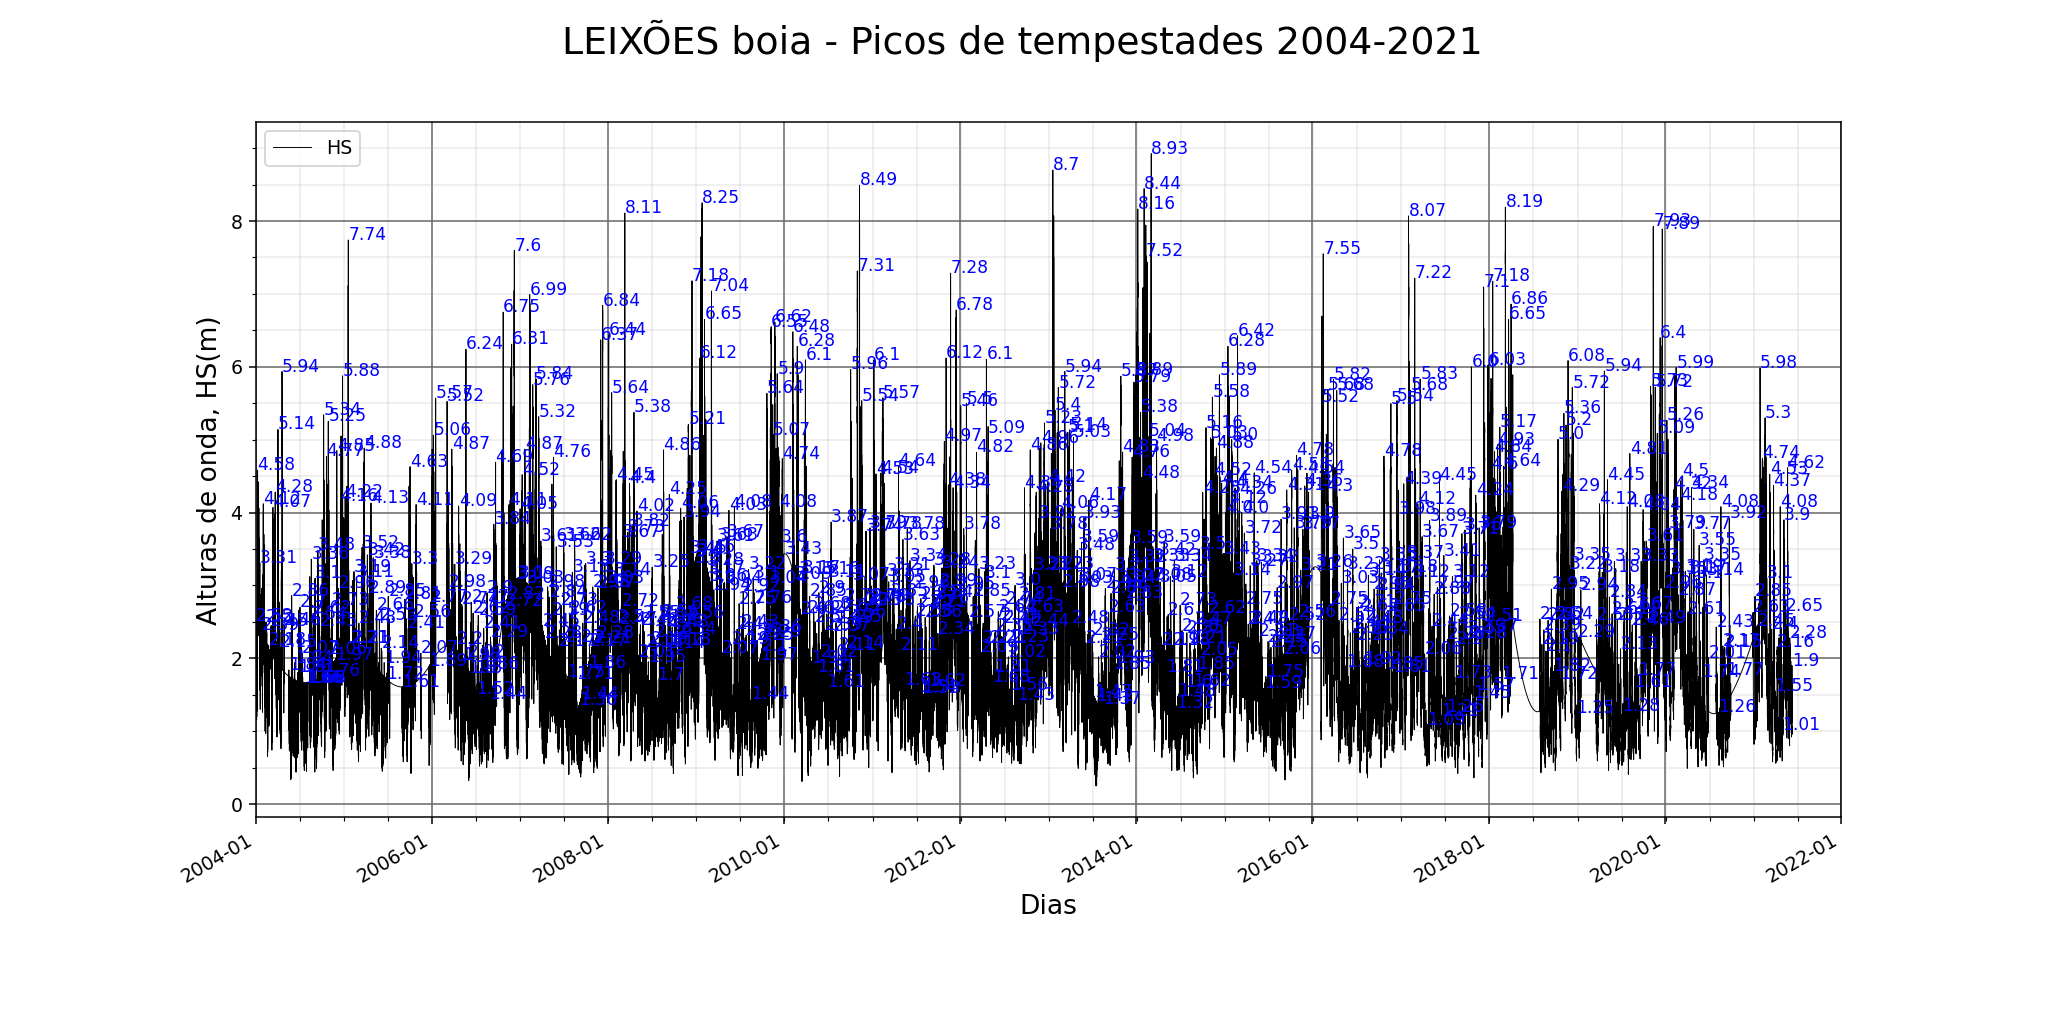

In [9]:
fig, ax = plt.subplots(figsize=(15, 7.5))

ax.plot(timeseries.index, timeseries.HS, linestyle='-', color='black', label='HS', linewidth=0.5)

ax.set_xlim([dt.date(2004, 1, 1), dt.date(2022, 1, 1)])

peaks, _ = find_peaks(timeseries.HS, distance=7*24)
for index in peaks:
    ax.text(timeseries.index[index], timeseries.HS[index], timeseries.HS[index].round(2), size=9, color='blue')

half_year_locator = mdates.MonthLocator(interval=24)
ax.xaxis.set_major_locator(half_year_locator)

monthly_locator = mdates.MonthLocator()
ax.xaxis.set_minor_locator(monthly_locator)

plt.legend(loc='upper left')

plt.suptitle('LEIXÕES boia - Picos de tempestades 2004-2021', fontsize=20)

plt.xlabel('Dias', fontsize=14)
plt.ylabel('Alturas de onda, HS(m)', fontsize=14)

plt.grid(visible=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(visible=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

fig.autofmt_xdate()

In [10]:
fig.savefig('leixões_tempestades.pdf', orientation='portrait', bbox_inches='tight', dpi=1200)

In [11]:
peaks, _ = find_peaks(timeseries.HS, distance=7*24)
for index in peaks:
    if timeseries.HS[index] >= 5:
        print(timeseries.index[index],",",
              timeseries.HS[index].round(2),",",
              timeseries.TP[index].round(1),",",
              timeseries.THTP[index].round(1),",",
              timeseries.TIDE[index].round(2)
             )

2004-04-02 11:00:00 , 5.14 , 14.3 , 318.0 , 2.07
2004-04-19 05:00:00 , 5.94 , 15.4 , 321.0 , 2.63
2004-10-08 20:00:00 , 5.34 , 11.1 , 222.5 , 2.08
2004-10-28 03:00:00 , 5.25 , 12.5 , 302.0 , 3.6
2004-12-26 03:00:00 , 5.88 , 14.8 , 312.0 , 3.41
2005-01-19 04:00:00 , 7.74 , 18.2 , 303.0 , 1.59
2006-01-06 21:00:00 , 5.06 , 13.3 , 310.0 , 2.56
2006-01-16 11:00:00 , 5.57 , 15.4 , 301.0 , 1.1
2006-03-04 21:00:00 , 5.52 , 10.2 , 298.0 , 2.44
2006-05-22 02:00:00 , 6.24 , 15.4 , 302.0 , 1.79
2006-10-23 16:00:00 , 6.75 , 13.8 , 293.5 , 3.4
2006-11-27 15:00:00 , 6.31 , 17.4 , 292.5 , 1.58
2006-12-08 19:00:00 , 7.6 , 14.4 , 303.0 , 3.04
2007-02-10 13:00:00 , 6.99 , 18.2 , 294.0 , 1.19
2007-02-23 03:00:00 , 5.76 , 16.0 , 284.5 , 1.75
2007-03-07 20:00:00 , 5.84 , 13.8 , 308.5 , 2.13
2007-03-19 18:00:00 , 5.32 , 14.3 , 326.5 , 2.17
2007-12-02 04:00:00 , 6.37 , 18.2 , 311.0 , 1.74
2007-12-10 03:00:00 , 6.84 , 18.2 , 318.0 , 3.51
2008-01-04 03:00:00 , 6.44 , 18.2 , 286.0 , 1.86
2008-01-16 11:00:00 , 5.

# LEIXÕES boia - Picos de tempestades últimos 10 anos

<IPython.core.display.Javascript object>


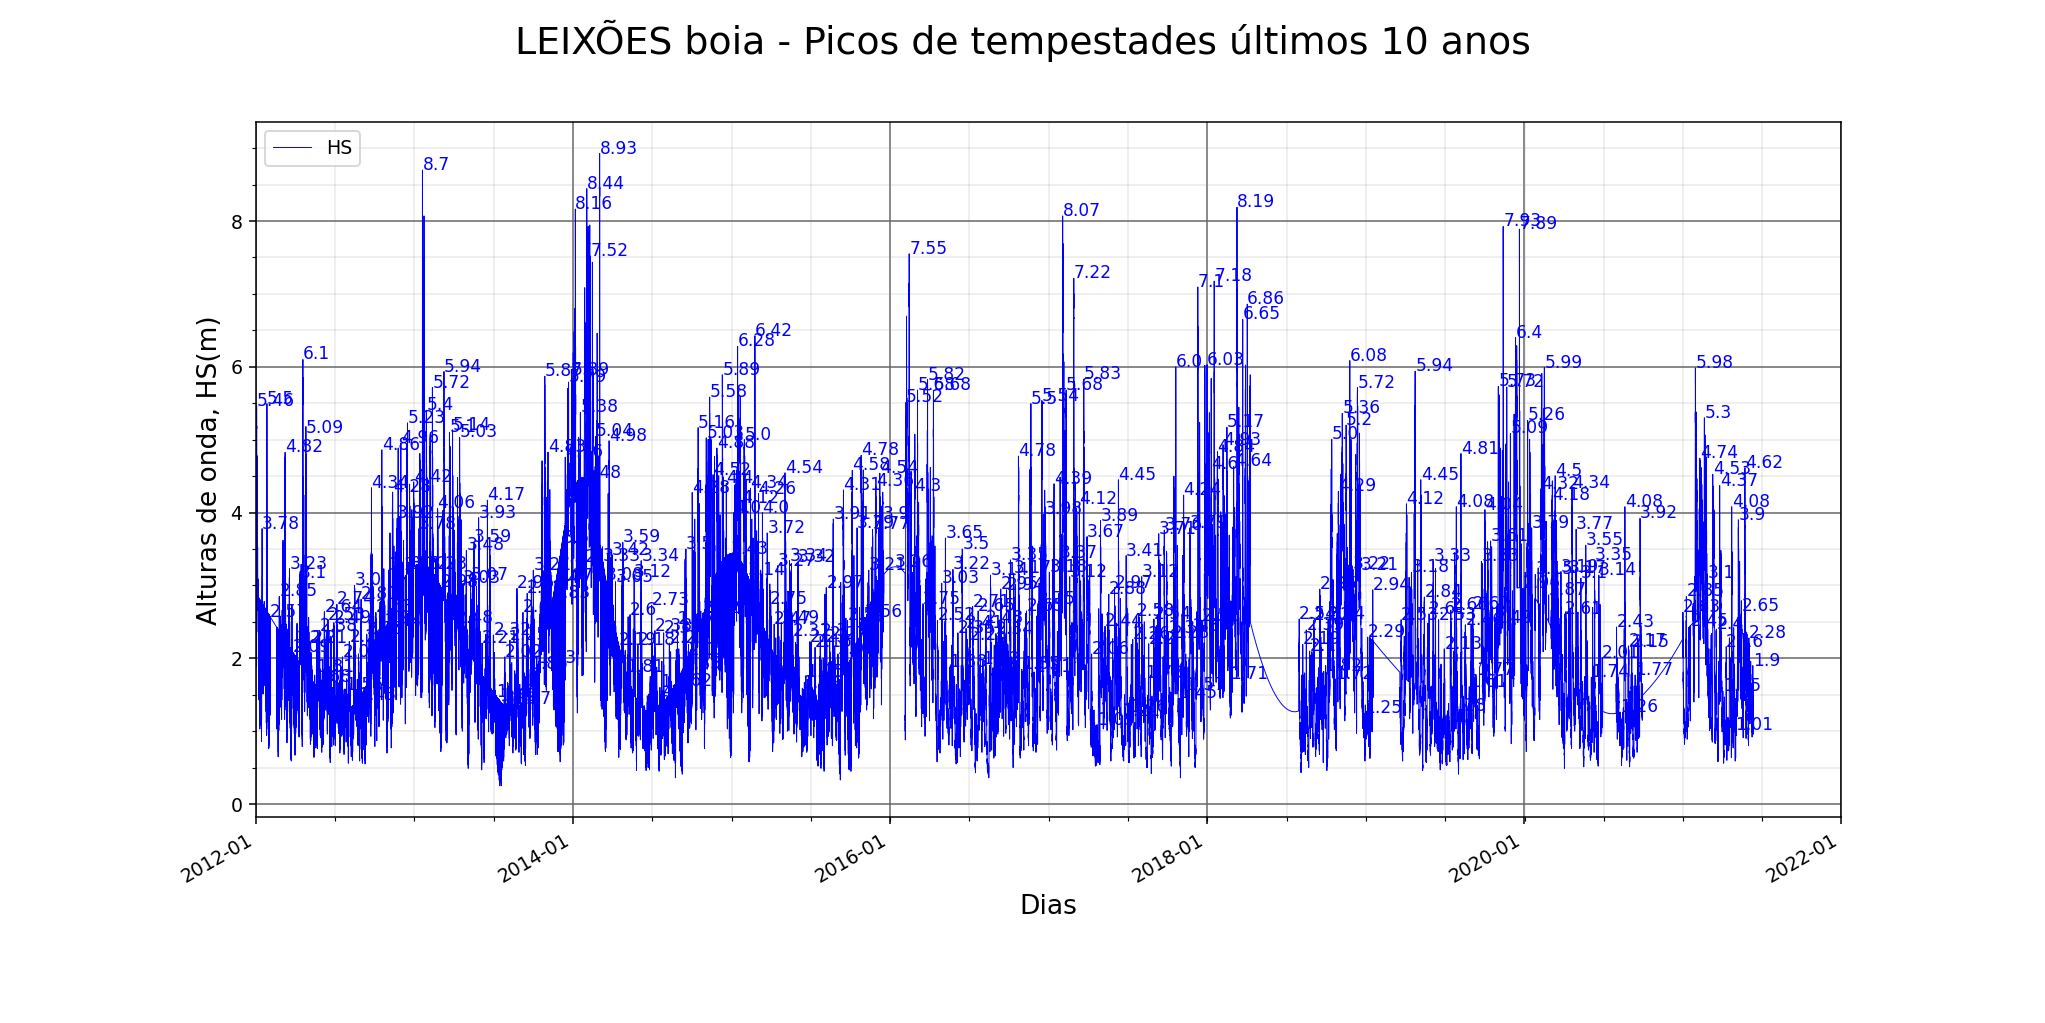

In [19]:
timeseries10 = timeseries["2012-01-01":"2022-01-31"]

fig, ax = plt.subplots(figsize=(15, 7.5))

ax.plot(timeseries10.index, timeseries10.HS, linestyle='-', color='blue', label='HS', linewidth=0.5)

ax.set_xlim([dt.date(2012, 1, 1), dt.date(2022, 1, 1)])

peaks, _ = find_peaks(timeseries10.HS, distance=7*24)
for index in peaks:
    ax.text(timeseries10.index[index], timeseries10.HS[index], timeseries10.HS[index].round(2), size=9, color='blue')

half_year_locator = mdates.MonthLocator(interval=24)
ax.xaxis.set_major_locator(half_year_locator)

monthly_locator = mdates.MonthLocator()
ax.xaxis.set_minor_locator(monthly_locator)

plt.legend(loc='upper left')

plt.suptitle('LEIXÕES boia - Picos de tempestades últimos 10 anos', fontsize=20)

plt.xlabel('Dias', fontsize=14)
plt.ylabel('Alturas de onda, HS(m)', fontsize=14)

plt.grid(visible=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(visible=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

fig.autofmt_xdate()

In [13]:
fig.savefig('leixões10_tempestades.pdf', orientation='portrait', bbox_inches='tight', dpi=1200)

# LEIXÕES boia - Picos de tempestades últimos 2 anos

<IPython.core.display.Javascript object>


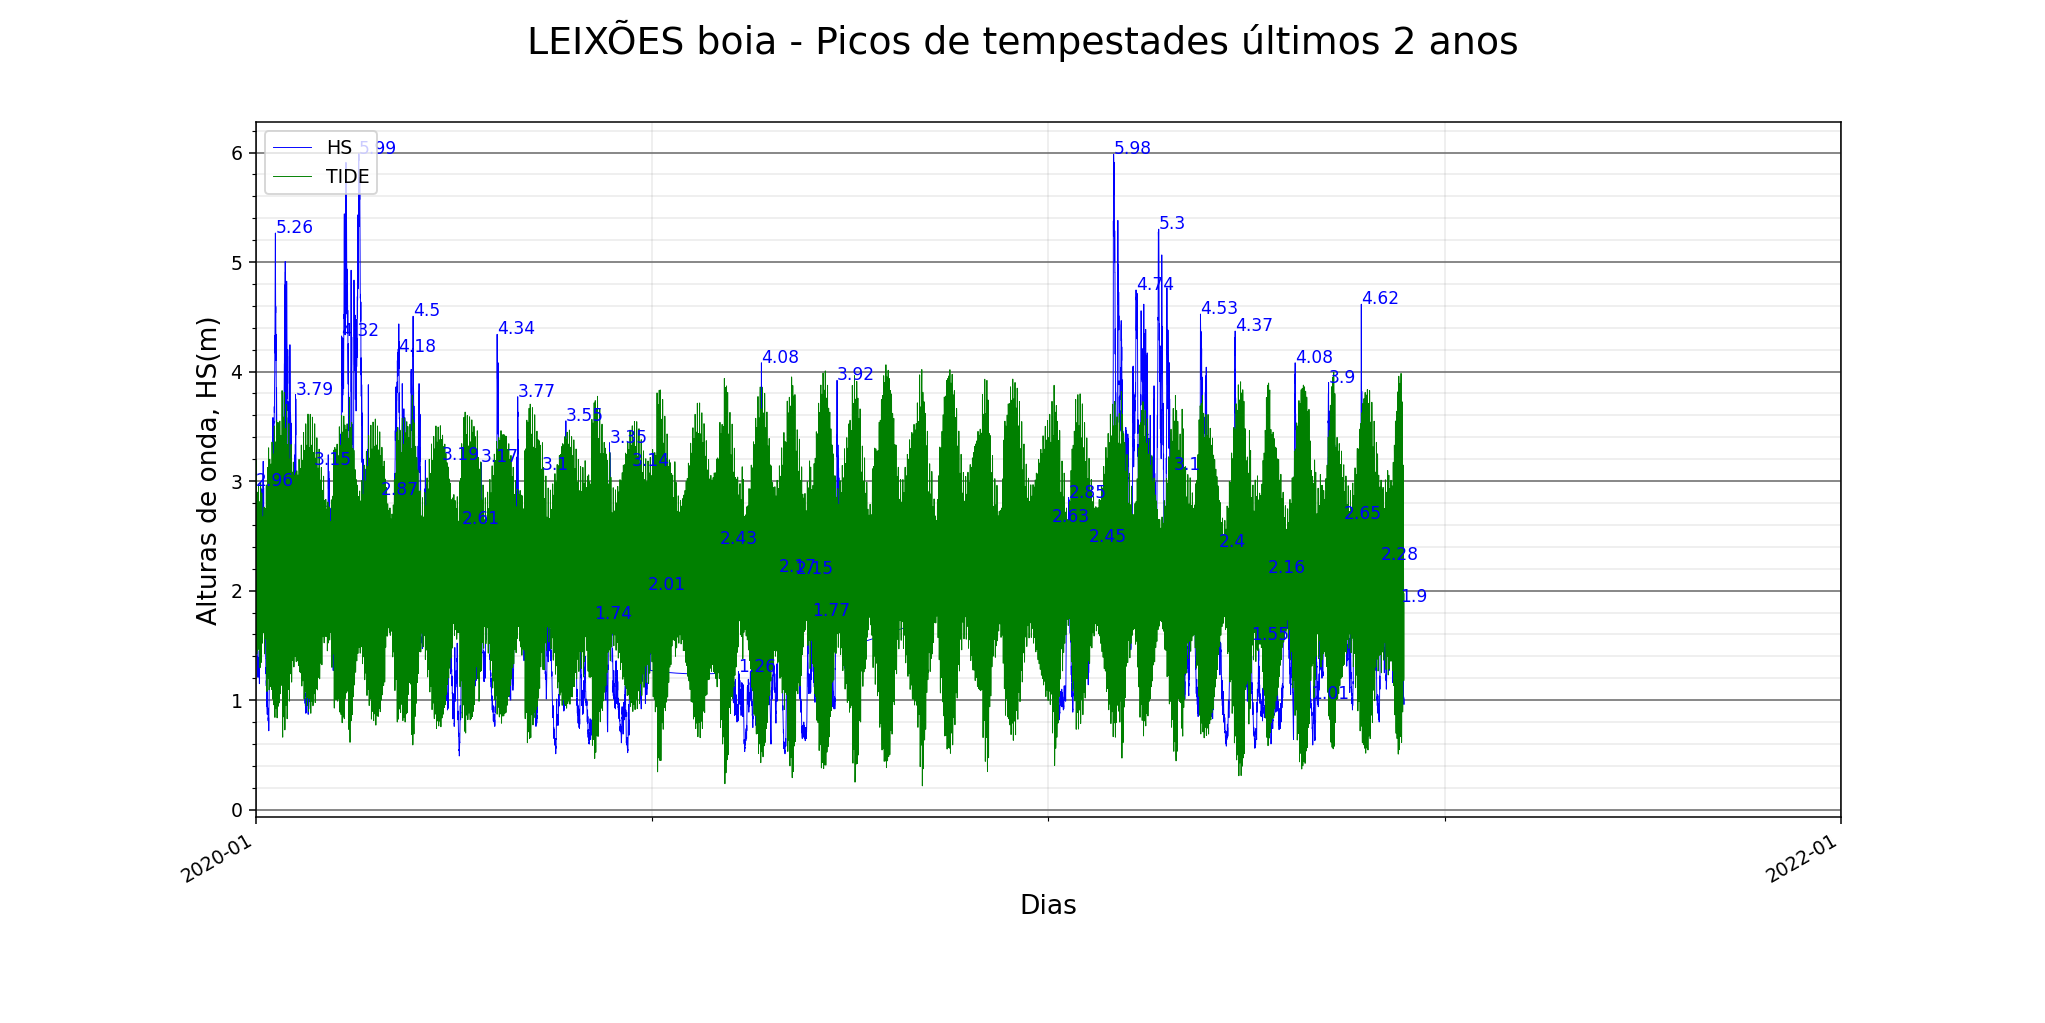

In [14]:
timeseries2 = timeseries["2020-01-01":"2022-01-31"]

fig, ax = plt.subplots(figsize=(15, 7.5))

ax.plot(timeseries2.index, timeseries2.HS, linestyle='-', color='blue', label='HS', linewidth=0.5)
ax.plot(timeseries2.index, timeseries2.TIDE, linestyle='-', color='green', label='TIDE', linewidth=0.5)

ax.set_xlim([dt.date(2020, 1, 1), dt.date(2022, 1, 1)])

peaks, _ = find_peaks(timeseries2.HS, distance=7*24)
for index in peaks:
    ax.text(timeseries2.index[index], timeseries2.HS[index], timeseries2.HS[index].round(2), size=9, color='blue')

half_year_locator = mdates.MonthLocator(interval=24)
ax.xaxis.set_major_locator(half_year_locator)

monthly_locator = mdates.MonthLocator()
ax.xaxis.set_minor_locator(monthly_locator)

plt.legend(loc='upper left')

plt.suptitle('LEIXÕES boia - Picos de tempestades últimos 2 anos', fontsize=20)

plt.xlabel('Dias', fontsize=14)
plt.ylabel('Alturas de onda, HS(m)', fontsize=14)

plt.grid(visible=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(visible=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

fig.autofmt_xdate()

In [15]:
fig.savefig('leixões2_tempestades.pdf', orientation='portrait', bbox_inches='tight', dpi=1200)